In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from math import floor
import numpy as np
from scipy import stats
from matplotlib.colors import TwoSlopeNorm

rcParams["font.size"] = 14
rcParams["font.family"] = 'arial'
rcParams['axes.facecolor'] = 'white'

In [2]:
df = pd.read_csv("/Path/to/adata_merge_obs_metadata.csv", index_col=0)
df

/tmp/ipykernel_173213/1362166410.py:1: DtypeWarning: Columns (13,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("adata_merge_obs_metadata_20230925.csv", index_col=0)


,Clusters,_X,_Y,initial_size_spliced,initial_size_unspliced,initial_size,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,...,velocity_self_transition,velocity_length,velocity_confidence,velocity_confidence_transition,root_cells,end_points,velocity_pseudotime,velocity_pseudotime_default,velocity_pseudotime_rev,velocity_pseudotime_tuned
CellID,,,,,,,,,,,,,,,,,,,,,
R-TAN-BB2-AAACCTGGTCTAGTGT-1,7,40.906550,20.219010,5517,3021,5517.0,Enriched B,9640.0,2812,3.475104,...,0.354088,2.76,0.931594,0.024904,0.004298,0.011705,0.590676,0.482192,0.511681,0.590676
R-TAN-BB2-AAAGATGGTACAGCAG-1,0,12.837214,21.599703,1943,1048,1943.0,Enriched B,3429.0,1352,3.353747,...,0.349251,1.76,0.835861,0.077283,0.000638,0.312490,0.586166,0.490134,0.503613,0.586166
R-TAN-BB2-AAACGGGGTCACCTAA-1,1,7.917360,-28.980621,392,293,392.0,Enriched B,781.0,496,5.377721,...,0.200873,3.17,0.485191,0.237297,0.004142,0.002000,0.588272,0.488561,0.505093,0.588272
R-TAN-BB2-AAACCTGTCCCTCAGT-1,1,22.895107,-23.123066,2402,1468,2402.0,Enriched B,4201.0,1635,4.118067,...,0.473478,2.80,0.945153,-0.088519,0.000297,1.000000,0.586474,0.489021,0.504778,0.586474
R-TAN-BB2-AAACCTGGTGATAAGT-1,2,-10.515806,22.304138,1404,528,1404.0,Enriched B,2811.0,1236,3.984347,...,0.213155,2.17,0.873111,0.133605,0.000621,0.603500,0.586145,0.490241,0.503503,0.586145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R-CHEN-BB2-TTTGCGCGTACCGAGA-1,8,38.901100,-25.747307,1631,617,1631.0,Enriched B,3239.0,1085,2.562519,...,0.232077,3.79,0.890773,0.161220,0.115266,0.000002,0.594067,0.478022,0.515834,0.594067
R-CHEN-BB2-TTTGCGCGTTCCACGG-1,11,0.562139,-18.388870,1453,387,1453.0,Enriched B,2834.0,969,2.187721,...,0.212199,2.09,0.885281,0.077365,0.001789,0.025424,0.586224,0.490515,0.503206,0.586224
R-CHEN-BB2-TTTGCGCAGGATTCGG-1,7,-0.220377,-40.162304,1850,710,1850.0,Enriched B,3790.0,1387,4.248021,...,0.188526,1.57,0.828427,0.237537,0.005277,0.004858,0.586483,0.489985,0.503749,0.586483


In [3]:
cell_order = ["Pre-pro B", "Cycling pro B", "Pro B", 
               "Cycling pre B", "Pre B", 
               "Immature B", "FTLhi immature B", "S100A8hi immature B",
               "Naive B", "FOShi naive B", "HSPA1Ahi naive B",
               "LZ GC B", "DZ GC B", 
               "Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B", "PB", "PC"]
color_lst = ["#e7dfd5", "#d04925", "#84a9ac", "#992e24", "#3b6978", 
          "#62cdff", "#97deff", "#c9eeff", "#14c38e", "#b8f1b0", "#e3fcbf", 
          "#f9c5d5", "#f2789f", "#40128b", "#9336b4", 
          "#dd58d6", "#f6ba6f", "#f9d923"]

/tmp/ipykernel_173213/4046669294.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


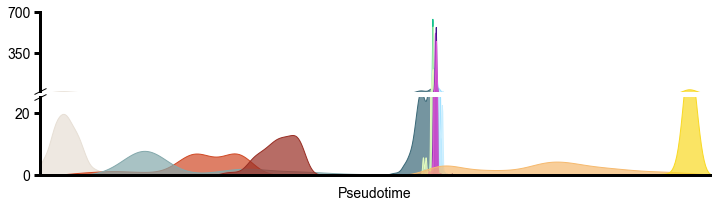

In [4]:
fig, axes = plt.subplots(2,1, figsize=(12,3), gridspec_kw = {'wspace':0, 'hspace':0.08})

breakpoint = 25
hide_cell_type_lst = ["LZ GC B", "DZ GC B"]

ax = axes[1]
for i, ct in enumerate(cell_order):
    if ct not in hide_cell_type_lst:
        ax = sns.kdeplot(df["velocity_pseudotime"][df["CellType"]==ct], 
                         fill=True, ax=ax, color=color_lst[i], alpha=0.7)
ax.set_xlim(0,1)
ax.set_ylim(0,breakpoint)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.xaxis.set_tick_params(width=3, length=4)
ax.yaxis.set_tick_params(width=3, length=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels([])
ax.set_xlabel("Pseudotime")
ax.set_ylabel("")
ax.set_facecolor("white")

ax = axes[0]
for i, ct in enumerate(cell_order):
    if ct not in hide_cell_type_lst:
        ax = sns.kdeplot(df["velocity_pseudotime"][df["CellType"]==ct], 
                         fill=True, ax=ax, color=color_lst[i], alpha=0.7)
ax.set_xlim(0,1)
ax.set_ylim(breakpoint, 700)
ax.set_yticks([350,700])
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels([])
ax.yaxis.set_tick_params(width=3, length=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_facecolor("white")

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
axes[0].plot([0], [0], transform=axes[0].transAxes, **kwargs)
axes[1].plot([0], [1], transform=axes[1].transAxes, **kwargs)


plt.tight_layout()

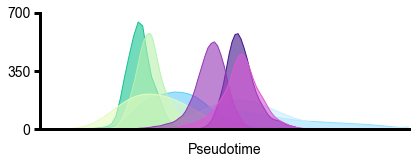

In [5]:
fig, ax = plt.subplots(figsize=(6,2.5))

breakpoint = 20
hide_cell_type_lst = ["LZ GC B", "DZ GC B"]

for i, ct in enumerate(cell_order):
    if ct not in hide_cell_type_lst and i >= 5 and i <= 15:
        ax = sns.kdeplot(df["velocity_pseudotime"][df["CellType"]==ct], 
                         fill=True, ax=ax, color=color_lst[i], alpha=0.6)
ax.set_xlim(0.581,0.60)

ax.set_ylim(0,700)
ax.set_yticks(range(0,701,350))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.xaxis.set_tick_params(width=3, length=6)
ax.yaxis.set_tick_params(width=3, length=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Pseudotime")
ax.set_ylabel("")
ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels([])

plt.tight_layout()

In [6]:
# The velocity score was computed for all qualified genes, 
# thus we don't need fill the blank with 0.
df_rank = pd.read_csv("/Path/to/rank_velocity_genes.csv", index_col=0)
df_rank

,Pre-pro B_names,Pre-pro B_scores,Cycling pro B_names,Cycling pro B_scores,Pro B_names,Pro B_scores,Cycling pre B_names,Cycling pre B_scores,Pre B_names,Pre B_scores,...,Classical memory B_names,Classical memory B_scores,IgM+ memory B_names,IgM+ memory B_scores,CD27-IgM+IgD+ memory B_names,CD27-IgM+IgD+ memory B_scores,PB_names,PB_scores,PC_names,PC_scores
0,ERG,238.04,CDK6,52.83,ERG,78.41,DIAPH3,97.22,AL139020.1,111.47,...,TOX,117.20,LINC01781,143.72,SOX5,92.46,SELENOM,48.43,PRDM1,159.50
1,CDK6,182.79,CNTLN,48.07,IQGAP2,64.98,RRM2,85.76,MME,104.15,...,NEK6,112.42,MAST4,120.13,TFEC,80.11,CST3,32.46,CYTOR,152.03
2,IQGAP2,172.66,BAHCC1,47.39,MME,60.75,E2F2,79.54,MSH6,94.25,...,SSPN,110.98,HIPK2,119.42,FGR,72.65,SDC1,31.65,CREB3L2,135.53
3,ZMIZ1,160.87,ZMIZ1,44.64,ARPP21,53.37,BRIP1,76.20,HCK,90.58,...,BAIAP3,99.15,SSPN,114.30,FCRL3,66.25,IGHG1,30.96,EYA2,135.04
4,ARPP21,158.88,BRIP1,42.94,CDK6,52.15,PLK4,70.60,ADAM23,90.31,...,DNAH8,97.13,CD70,113.10,FCRL5,59.80,JCHAIN,30.47,NEAT1,126.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,FXYD2,-51.57,NR4A2,-22.30,FCRL3,-21.98,ACTB,-39.08,CCR7,-61.96,...,PECAM1,-44.72,MIR181A1HG,-53.67,IL2RA,-20.94,PLD4,-23.62,IRAK3,-42.54
262,VPREB1,-52.36,FCRL3,-23.90,NEDD9,-22.61,NR4A2,-39.11,NR4A2,-62.59,...,IRAK3,-47.03,PECAM1,-58.10,PEG10,-21.50,NR4A2,-27.04,PCDH9,-44.74
263,HMGB2,-74.36,TNFAIP3,-24.72,ACTB,-25.55,FCRL3,-44.54,ZNF331,-63.47,...,FCRL3,-47.99,IGHD,-58.14,CDK6,-22.28,CD38,-30.51,NR4A2,-46.65
264,RPS2,-78.47,ZNF331,-27.69,ZNF331,-26.23,ZNF331,-52.32,FCRL3,-80.99,...,PCDH9,-48.46,PCDH9,-93.62,PECAM1,-22.89,FCRL3,-31.21,ZNF331,-56.13


In [7]:
for i, ct in enumerate(cell_order):
    df_temp = df_rank.set_index("%s_names"%ct)["%s_scores"%ct]
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)
dF.columns = [ x.split("_")[0] for x in dF.columns ]
dF

,Pre-pro B,Cycling pro B,Pro B,Cycling pre B,Pre B,Immature B,FTLhi immature B,S100A8hi immature B,Naive B,FOShi naive B,HSPA1Ahi naive B,LZ GC B,DZ GC B,Classical memory B,IgM+ memory B,CD27-IgM+IgD+ memory B,PB,PC
ERG,238.04,34.16,78.41,-2.98,-9.62,-13.86,-7.06,-4.83,-36.44,-8.54,-0.98,-1.46,1.59,-7.80,-19.04,-6.48,-5.15,-7.30
CDK6,182.79,52.83,52.15,17.15,48.80,-25.06,-12.91,-11.91,-54.71,-10.87,-1.95,3.46,5.26,-8.66,-45.41,-22.28,-7.89,55.34
IQGAP2,172.66,34.14,64.98,30.17,56.36,-11.26,-18.64,11.56,-75.14,-5.44,-2.48,0.00,5.60,-15.60,-27.63,26.56,-13.13,-6.05
ZMIZ1,160.87,44.64,50.05,12.08,1.28,-1.09,-11.08,16.99,-115.78,-23.48,-3.08,7.48,3.77,36.12,27.47,32.79,-9.01,-1.87
ARPP21,158.88,21.58,53.37,40.85,53.18,-23.44,-11.92,-12.32,-58.84,-13.26,-1.53,-2.01,6.46,-12.81,-30.46,-10.31,-8.35,-11.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FXYD2,-51.57,-8.65,11.29,7.13,5.43,6.92,8.16,0.46,1.34,-0.29,-0.08,-1.59,-0.10,-0.62,-0.62,0.03,-0.21,0.31
VPREB1,-52.36,13.53,34.69,48.09,40.57,-18.44,-9.07,-9.29,-44.97,-10.41,-1.11,-1.09,10.15,-9.62,-23.78,-7.90,-6.64,-9.15
HMGB2,-74.36,-3.80,15.24,11.10,-0.33,12.87,4.44,-3.55,-20.75,6.12,-0.69,1.33,2.85,-0.67,-2.40,3.84,8.26,20.33
RPS2,-78.47,-17.74,2.55,12.18,2.01,14.85,-12.65,10.69,-45.14,-6.34,1.59,15.02,5.36,-9.64,32.00,10.20,21.45,14.98


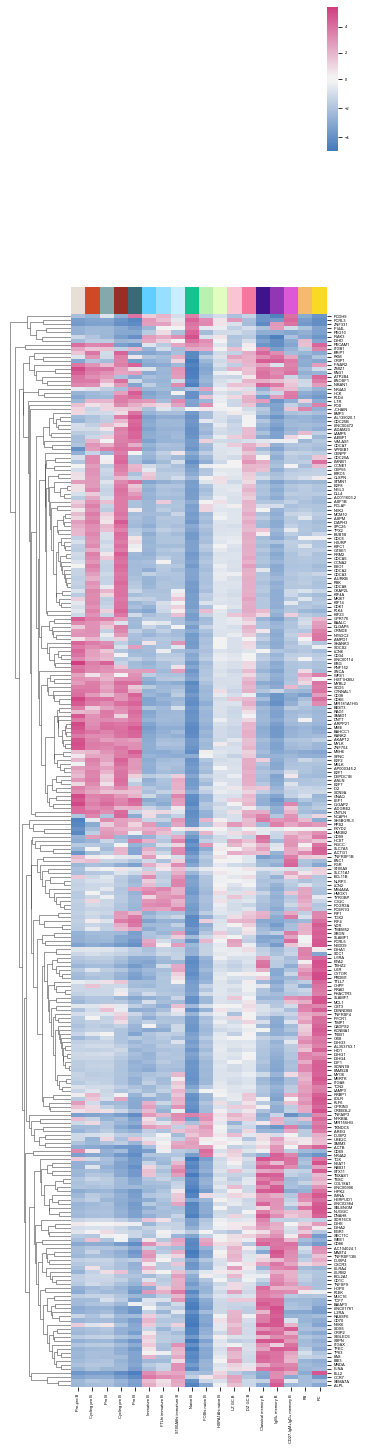

In [8]:
df_log = dF.applymap(lambda x:0 if np.isnan(x) or x == 0 else np.log(abs(x)+1)*(abs(x)/x))

rdgn = sns.diverging_palette(250, 349, n=100, sep=10, as_cmap=True)
divnorm = TwoSlopeNorm(vmin=df_log.min().min(), vcenter=0, vmax=df_log.max().max())

rcParams["font.size"] = 4

g = sns.clustermap(df_log, figsize=(5,20), cmap=rdgn, norm=divnorm, 
                   col_cluster=False, cbar_pos=(0.9, 0.9, 0.03, 0.1),
                  col_colors=color_lst, colors_ratio=0.02, yticklabels=True)

/share/home/yangxiujia/.local/lib/python3.9/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/tmp/ipykernel_173213/863441814.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


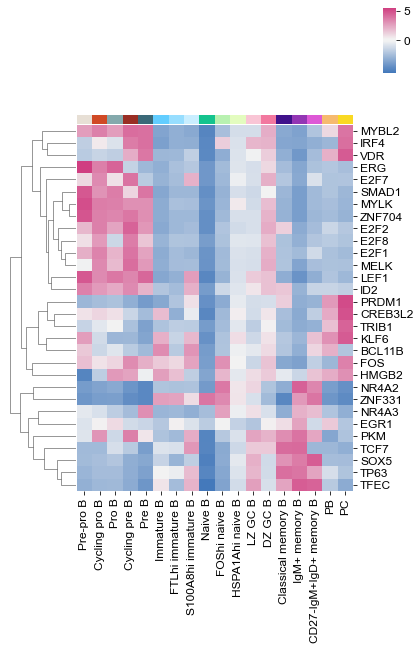

In [9]:
gene_lst = ["E2F7", "ID2", "LEF1", "MYLK", "ZNF704", "SMAD1", "E2F2", "MELK", "E2F1", "MYBL2",
           "ERG", "E2F8", "IRF4", "VDR", "PKM", "EGR1", "TCF7", "SOX5", "TFEC", "FOS",
           "HMGB2", "KLF6", "BCL11B", "CREB3L2", "PRDM1", "TRIB1", "NR4A3", "NR4A2", "ZNF331", "FOS", "TP63"]
df_temp = dF[dF.index.isin(gene_lst)]

df_log = df_temp.applymap(lambda x:0 if np.isnan(x) or x == 0 else np.log(abs(x)+1)*(abs(x)/x))

rdgn = sns.diverging_palette(250, 349, n=100, sep=10, as_cmap=True)
divnorm = TwoSlopeNorm(vmin=df_log.min().min(), vcenter=0, vmax=df_log.max().max())

rcParams["font.size"] = 12
g = sns.clustermap(df_log, figsize=(6,9), cmap=rdgn, norm=divnorm, square=True,
                   col_cluster=False, cbar_pos=(0.9, 0.9, 0.03, 0.1),
                  col_colors=color_lst, colors_ratio=0.02, yticklabels=True, xticklabels=True)
plt.tight_layout()

/tmp/ipykernel_173213/3909056821.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


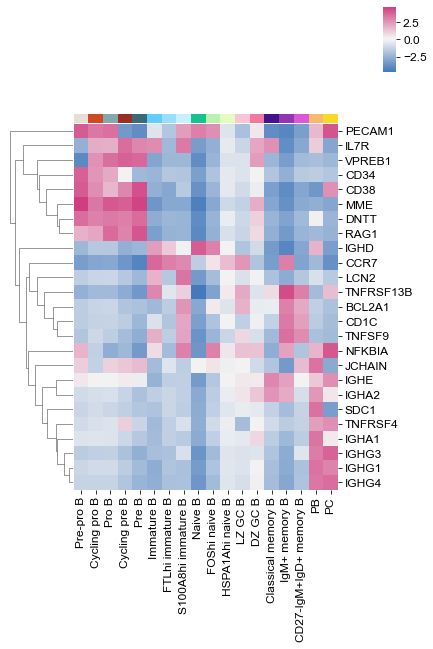

In [10]:
gene_lst = ["IL7R", "RAG1", "MME", "DNTT", "CD38", "CD34", "VPREB1", "IGHE", "IGHA2", "TNFRSF13B", "BCL2A1",
           "CD1C", "TNFSF9", "CCR7", "JCHAIN", "NFKBIA", "LCN2", "CST2", "IGHA1", "SDC1", "IGHG3",
           "IGHG4", "IGHG1","TNFRSF4", "PECAM1", "IGHD"]
df_temp = dF[dF.index.isin(gene_lst)]

df_log = df_temp.applymap(lambda x:0 if np.isnan(x) or x == 0 else np.log(abs(x)+1)*(abs(x)/x))

rdgn = sns.diverging_palette(250, 349, n=100, sep=10, as_cmap=True)
divnorm = TwoSlopeNorm(vmin=df_log.min().min(), vcenter=0, vmax=df_log.max().max())

rcParams["font.size"] = 12
g = sns.clustermap(df_log, figsize=(6,9), cmap=rdgn, norm=divnorm, square=True,
                   col_cluster=False, cbar_pos=(0.9, 0.9, 0.03, 0.1),
                  col_colors=color_lst, 
                   colors_ratio=0.02, yticklabels=True, xticklabels=True)
plt.tight_layout()